In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

/tmp/ipykernel_14577/2915278657.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = {
    "school_id": [101, 102, 103, 104, 105, 106],
    "school_name": [
        "Akins HS", "Bowie HS", "Eastside ECHS", 
        "LBJ HS", "Anderson HS", "Travis HS"
    ],
    "perc_econ_disadv": [0.72, 0.18, 0.91, 0.84, 0.15, 0.88],
    "student_teacher_ratio": [16.5, 15.1, 13.2, 17.8, 14.9, 16.0],
    "perc_ell": [0.23, 0.07, 0.32, 0.28, 0.04, 0.31],
    "enrollment": [2100, 2700, 900, 1400, 2300, 1200],
    "ESA_score": [59, 75, 40, 48, 82, 45],
    "FCA_score": [80, 90, 55, 62, 95, 50],
}

df = pd.DataFrame(data)
df

,school_id,school_name,perc_econ_disadv,student_teacher_ratio,perc_ell,enrollment,ESA_score,FCA_score
0,101,Akins HS,0.72,16.5,0.23,2100,59,80
1,102,Bowie HS,0.18,15.1,0.07,2700,75,90
2,103,Eastside ECHS,0.91,13.2,0.32,900,40,55
3,104,LBJ HS,0.84,17.8,0.28,1400,48,62
4,105,Anderson HS,0.15,14.9,0.04,2300,82,95
5,106,Travis HS,0.88,16.0,0.31,1200,45,50


In [3]:
ESA_BINS = [0, 35, 50, 65, 80, 100]

def discretize_score(score):
    for i in range(len(ESA_BINS) - 1):
        if ESA_BINS[i] <= score <= ESA_BINS[i+1]:
            return i
    return None

In [4]:
df["ESA_class"] = df["ESA_score"].apply(discretize_score)
df["FCA_class"] = df["FCA_score"].apply(discretize_score)

df

,school_id,school_name,perc_econ_disadv,student_teacher_ratio,perc_ell,enrollment,ESA_score,FCA_score,ESA_class,FCA_class
0,101,Akins HS,0.72,16.5,0.23,2100,59,80,2,3
1,102,Bowie HS,0.18,15.1,0.07,2700,75,90,3,4
2,103,Eastside ECHS,0.91,13.2,0.32,900,40,55,1,2
3,104,LBJ HS,0.84,17.8,0.28,1400,48,62,1,2
4,105,Anderson HS,0.15,14.9,0.04,2300,82,95,4,4
5,106,Travis HS,0.88,16.0,0.31,1200,45,50,1,1


In [5]:
feature_cols = [
    "perc_econ_disadv", 
    "student_teacher_ratio",
    "perc_ell",
    "enrollment"
]

X = df[feature_cols]
y = df["ESA_class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average="macro"))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Macro F1: 0.0


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.

In [6]:
df.to_csv("../data/processed/tabular_dataset.csv", index=False)

import joblib
joblib.dump(clf, "../results/tabular_model.joblib")

['../results/tabular_model.joblib']

In [7]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install transformers

!python ../src/text/train_text.py

Looking in indexes: https://download.pytorch.org/whl/cpu
/code/Project3COE/notebooks/../src/text/train_text.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2025-12-12 08:09:30.215648: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-12 08:09:30.277659: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-12 08:09:30.277756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607]

In [7]:
!pip install pdfplumber

In [8]:
!python ../src/text/extract_text.py

/code/Project3COE/notebooks/../src/text/extract_text.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[INFO] Processing Akins ECHS -> akins_echs.pdf
[INFO] Processing Anderson High School -> anderson_high_school.pdf
[INFO] Processing Austin High School -> austin_high_school.pdf
[INFO] Processing Bowie High School -> bowie_high_school.pdf
[INFO] Processing Crockett ECHS -> crockett_echs.pdf
[INFO] Processing Garza Independence -> garza_independence.pdf
[INFO] Processing Liberal Arts & Science Academy (LASA) -> liberal_arts_and_science_academy_lasa.pdf
[INFO] Processing LBJ ECHS -> lbj_echs.pdf
[I

In [10]:
import pandas as pd
df = pd.read_csv("../data/processed/text_dataset.csv")
df.head()

,School,ESA_Score,FCA_Score,ESA_Class,FCA_Class,text
0,Akins ECHS,59.0,80.0,1,2,Austin. The school’s purpose statement is to g...
1,Anderson High School,61.0,76.0,1,2,"including a T-STEM Academy (Texas Science, Tec..."
2,Austin High School,59.0,70.0,1,2,Austin High uses the Academy Model to group st...
3,Bowie High School,62.0,65.0,1,1,comprehensive high school in the district. Bow...
4,Crockett ECHS,55.0,52.0,1,1,south Austin and is known for its career and t...


In [11]:
df["ESA_Class"].unique(), df["FCA_Class"].unique()

(array([1, 0]), array([2, 1, 0]))

In [12]:
!python ../src/text/train_multitask_text.py

/code/Project3COE/notebooks/../src/text/train_multitask_text.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2025-12-12 21:05:08.812854: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-12 21:05:08.874240: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-12 21:05:08.874323: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting t

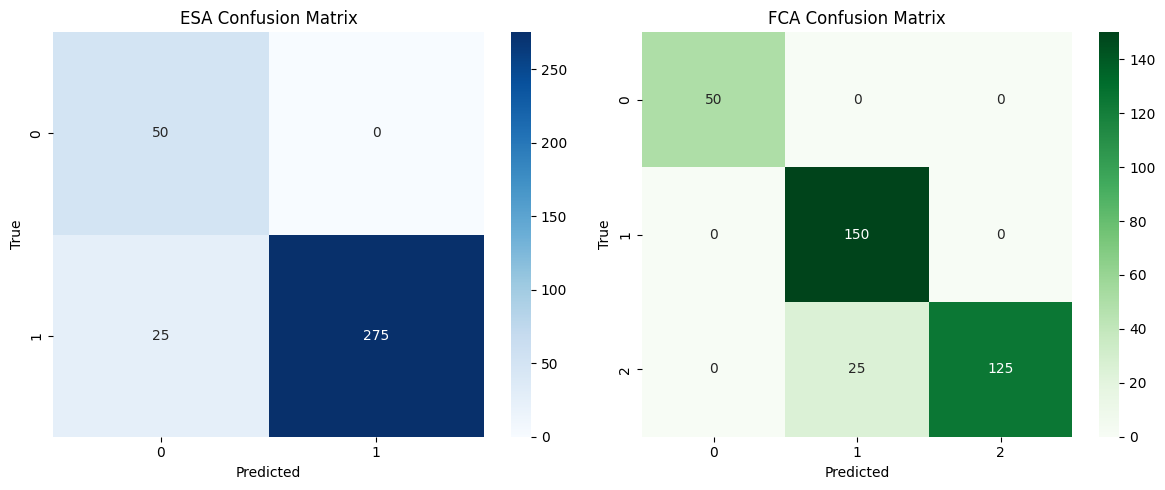

In [13]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Load saved eval results
with open("../models/distilbert_multitask/eval_results.pkl", "rb") as f:
    results = pickle.load(f)

all_esa_true = results["esa_true"]
all_esa_preds = results["esa_pred"]
all_fca_true = results["fca_true"]
all_fca_preds = results["fca_pred"]

# 2. Build confusion matrices
esa_cm = confusion_matrix(all_esa_true, all_esa_preds)
fca_cm = confusion_matrix(all_fca_true, all_fca_preds)

# 3. Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(esa_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ESA Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(fca_cm, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("FCA Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()

In [15]:
import torch
from transformers import DistilBertTokenizerFast
from torch import nn
from transformers import DistilBertModel


2025-12-12 21:30:45.921182: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-12 21:30:45.976912: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-12 21:30:45.976974: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-12 21:30:45.980702: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-12 21:30:45.995368: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-12 21:30:45.996928: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [16]:
class DistilBERTMultitask(nn.Module):
    def __init__(self, num_esa_classes=2, num_fca_classes=3):
        super().__init__()
        self.bert = DistilBertModel.from_pretrained("distilbert-base-uncased")
        hidden = self.bert.config.dim
        self.esa_classifier = nn.Linear(hidden, num_esa_classes)
        self.fca_classifier = nn.Linear(hidden, num_fca_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled = outputs.last_hidden_state[:, 0, :]
        return self.esa_classifier(pooled), self.fca_classifier(pooled)

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = DistilBERTMultitask().to(device)
model.load_state_dict(
    torch.load("../models/distilbert_multitask/model.pt", map_location=device)
)
model.eval()

print("✅ model loaded and ready")


/tmp/ipykernel_14577/974214320.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load("../models/distilbert_multitask/model.pt", map_location=device)


✅ model loaded and ready


In [18]:
tokenizer = DistilBertTokenizerFast.from_pretrained(
    "../models/distilbert_multitask/"
)

In [19]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader

df_text = pd.read_csv("../data/processed/text_dataset.csv")
df_text.head()

,School,ESA_Score,FCA_Score,ESA_Class,FCA_Class,text
0,Akins ECHS,59.0,80.0,1,2,Austin. The school’s purpose statement is to g...
1,Anderson High School,61.0,76.0,1,2,"including a T-STEM Academy (Texas Science, Tec..."
2,Austin High School,59.0,70.0,1,2,Austin High uses the Academy Model to group st...
3,Bowie High School,62.0,65.0,1,1,comprehensive high school in the district. Bow...
4,Crockett ECHS,55.0,52.0,1,1,south Austin and is known for its career and t...


In [38]:
class TextMultitaskDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=256):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            str(self.texts[idx]),
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0)
        }

In [39]:
def normalize_name(x):
    return (
        x.upper()
        .replace("HIGH SCHOOL", "H S")
        .replace("SCHOOL", "")
        .replace(".", "")
        .strip()
    )

df_text["SCH_NAME_NORM"] = df_text["School"].apply(normalize_name)

In [41]:
dataset = TextMultitaskDataset(df_text["text"], tokenizer)
loader = DataLoader(dataset, batch_size=8, shuffle=False)

esa_preds = []
fca_preds = []

with torch.no_grad():
    for batch in loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        esa_logits, fca_logits = model(input_ids, attention_mask)

        esa_preds.extend(torch.argmax(esa_logits, dim=1).cpu().numpy())
        fca_preds.extend(torch.argmax(fca_logits, dim=1).cpu().numpy())


In [47]:
text_preds = pd.DataFrame({
    "SCH_NAME": df_text["School"],
    "SCH_NAME_NORM": df_text["SCH_NAME_NORM"],
    "ESA_text": esa_preds,
    "FCA_text": fca_preds
})


text_preds.to_csv("../data/processed/text_predictions.csv", index=False)
print("✅ text_predictions.csv saved")

✅ text_predictions.csv saved
